In [1]:
import time
from functools import partial
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import itertools

In [2]:
# Define flops for continual scaled dot product block

def sdpa(n, d):
    return sum([
        2 * n * n * d + 2 * n * d, # mul
        2 * n * n * d - n * d - n, # add
        n * n, # exp
    ])

def coresdpa(n, d):
    return sum([
        7 * n * d + 2 * n - 3 * d, # mul
        6 * n * d + 3 * n - 6 * d - 3, # add
        3 * n - 2, # exp
    ])

def colesdpa(n, d):
    return sum([
        2 * n * d + 2 * d, # mul
        2 * n * d - d - 1, # add
        n, # exp
    ])

E = 100
N = 100
sdpa(N, E) / coresdpa(N, E), sdpa(N, E) / colesdpa(N, E), coresdpa(N, E) / colesdpa(N, E)

(30.947303591362253, 100.0, 3.231299286051892)

In [3]:
# Define mem for continual scaled dot product block

def sdpa_mem(n, d):
    #      A      Q,K,V,Ans  D  
    return n**2 + 4*n*d + n

def coresdpa_mem(n, d):
    #      K,V         Q,Ans   AV_mem    d_mem, A
    return 2*(n+1)*d + 2*n*d + (n-1)*d + 3*n - 1

def colesdpa_mem(n, d):
    #      K,V     a   d,Ans
    return 2*n*d + n + 2*d

E = 10
N = 100
sdpa_mem(N, E), coresdpa_mem(N, E), colesdpa_mem(N, E), sdpa_mem(N, E) / coresdpa_mem(N, E), sdpa_mem(N, E) / colesdpa_mem(N, E), coresdpa_mem(N, E) / colesdpa_mem(N, E)

(14100, 5309, 2120, 2.6558673949896403, 6.650943396226415, 2.504245283018868)

In [4]:
num_x_points = 5000

end = 512
mid = 256
height=200
# ex = np.logspace(0, 2, num=num_x_points)
# nx = np.logspace(0, 2, num=num_x_points)
ex = np.linspace(0, end, num=num_x_points)
nx = np.linspace(0, end, num=num_x_points)

num_y_points = 4
ey = np.array([10**i for i in range(num_y_points)])
ny = np.array([10**i for i in range(num_y_points)])

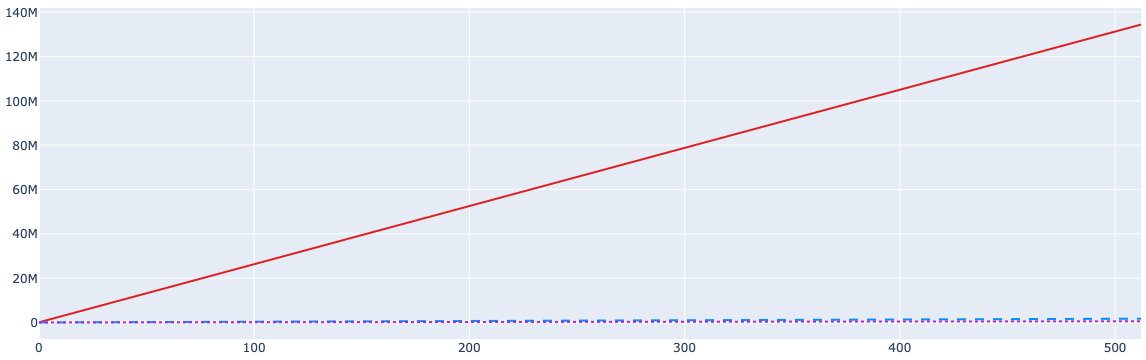

In [5]:
# FLOPs varying d
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

N = mid

fig.add_trace(go.Scatter(x=ex, y=[sdpa(N, e) for e in ex], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa(N, e) for e in ex], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth, dash="dash"),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa(N, e) for e in ex], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth, dash="dot"),))

margin = 5
fig.update_layout(
    autosize=False,
    width=250,
    height=height,
    showlegend=False,
    # xaxis_title="d",
    # yaxis_title="FLOPs / step",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_n.pdf")

# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.write_image("figures/theory_attn_comp_fixed_n_loglog.pdf")

fig.show()

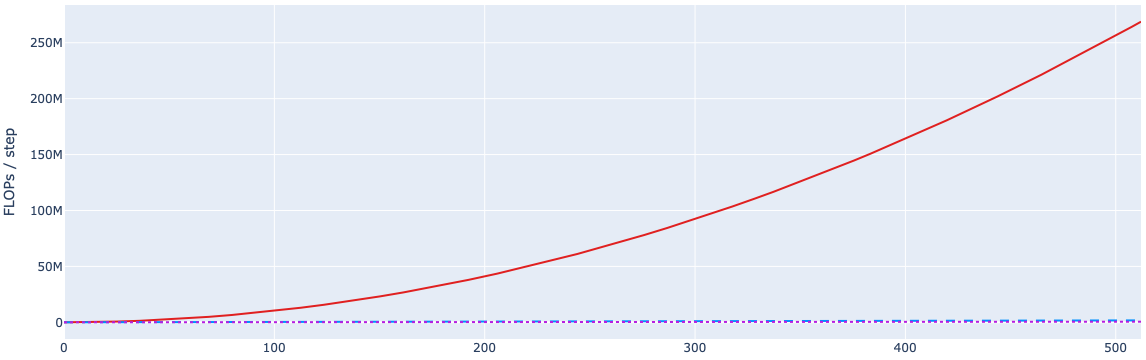

In [6]:
# FLOPs varying n
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

E = mid

fig.add_trace(go.Scatter(x=ex, y=[sdpa(n, E) for n in nx], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa(n, E) for n in nx], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth, dash="dash"),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa(n, E) for n in nx], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth, dash="dot"),))

margin = 5
fig.update_layout(
    autosize=False,
    width=270,
    height=height,
    showlegend=False,
    # xaxis_title="n",
    yaxis_title="FLOPs / step",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_d.pdf")

# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.write_image("figures/theory_attn_comp_fixed_d_loglog.pdf")

fig.show()

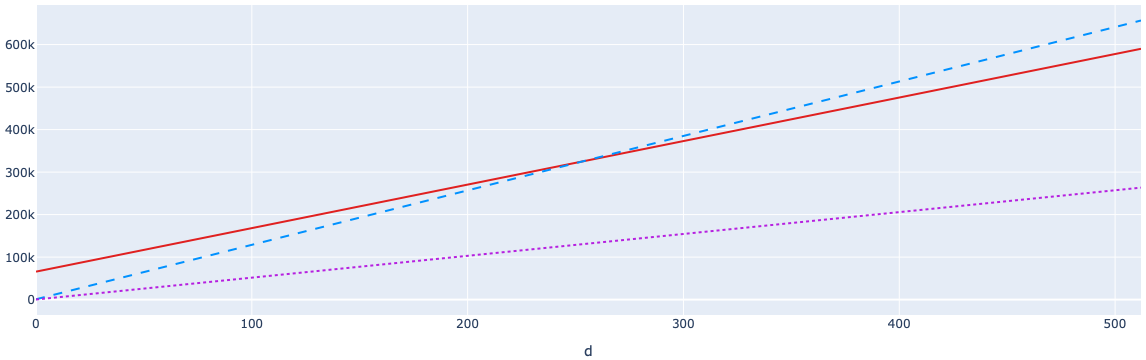

In [90]:
# Mem varying d
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

N = mid

fig.add_trace(go.Scatter(x=ex, y=[sdpa_mem(N, e) for e in ex], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa_mem(N, e) for e in ex], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth, dash="dash"),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa_mem(N, e) for e in ex], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth, dash="dot"),))

margin = 5
fig.update_layout(
    autosize=False,
    width=250,
    height=height,
    showlegend=False,
    xaxis_title="d",
    # yaxis_title="Memory (floats)",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_n_mem.pdf")

# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.write_image("figures/theory_attn_comp_fixed_n_loglog.pdf")

fig.show()

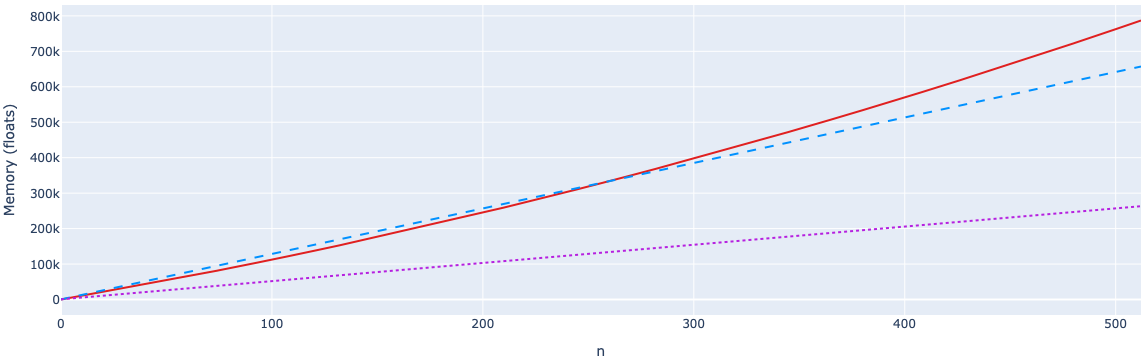

In [7]:
# Mem varying n
fig = go.Figure()
linewidth = 2
cred = "#E02020"
cblue = "#0091FF"
cpur = "#B620E0"

E = mid

fig.add_trace(go.Scatter(x=ex, y=[sdpa_mem(n, E) for n in nx], mode='lines', name='SDPA', line=dict(color=cred, width=linewidth),))

fig.add_trace(go.Scatter(x=ex, y=[coresdpa_mem(n, E) for n in nx], mode='lines', name='CoReSDPA', line=dict(color=cblue, width=linewidth, dash="dash"),))

fig.add_trace(go.Scatter(x=ex, y=[colesdpa_mem(n, E) for n in nx], mode='lines', name='CoLeSDPA', line=dict(color=cpur, width=linewidth, dash="dot"),))

margin = 5
fig.update_layout(
    autosize=False,
    width=270,
    height=height,
    showlegend=False,
    xaxis_title="n",
    yaxis_title="Memory (floats)",
    margin=dict(l=margin, r=margin, t=margin, b=margin)
)
fig.write_image("figures/theory_attn_comp_fixed_d_mem.pdf")

# fig.update_xaxes(type="log")
# fig.update_yaxes(type="log")
# fig.write_image("figures/theory_attn_comp_fixed_d_loglog.pdf")

fig.show()